# Assignment 4: September $9^{th}$, 2025 - Kanak Agarwal

## Greedy Algorithm

__Note__: In the question, in case 1, it fails to account for the $0^{th}$ index of the array. [5.5, 10.0, 8.25, 9.75, 5.0] is a valid solution for the input [10.0, 8.25, 9.75, 5.0].

In [31]:
class GreedyOrder:
    def __init__(self, orders, threshold):
        self.orders = orders
        self.threshold = threshold

    def check_valid(self, new_order):
        for i in range(len(new_order) - 2):
            avg = (new_order[i] + new_order[i + 1] + new_order[i + 2]) / 3
            if avg < self.threshold:
                return False
        return True
    
    def insert_order(self, revenue):
        n = len(self.orders)
        for i in range(n + 1):
            new_order = self.orders[:i] + [revenue] + self.orders[i:]
            if self.check_valid(new_order):
                self.orders = new_order
                return True
        return False
    
    def get_orders(self):
        return self.orders

orders = [10.0, 8.25, 9.75, 5.0]
x = 7.5
manager = GreedyOrder(orders, x)

print("Current orders:", manager.get_orders())
print("Trying to insert order with revenue 5.5 with threshold", x)
if manager.insert_order(5.5):
    print("Updated orders:", manager.get_orders())
else:
    print("Order rejected")

# Case 2
orders = [6.0, 7.0, 6.5]
x = 7.0
manager = GreedyOrder(orders, x)

print("\nCurrent orders:", manager.get_orders())
print("Trying to insert order with revenue 5.0 with threshold", x)
if manager.insert_order(5.0):
    print("Updated orders:", manager.get_orders())
else:
    print("Order rejected!")


Current orders: [10.0, 8.25, 9.75, 5.0]
Trying to insert order with revenue 5.5 with threshold 7.5
Updated orders: [5.5, 10.0, 8.25, 9.75, 5.0]

Current orders: [6.0, 7.0, 6.5]
Trying to insert order with revenue 5.0 with threshold 7.0
Order rejected!


The algorithm is greedy because at each step, it immediately makes a choice that seems best at the moment (choosing the maximum possible value for the current index) without considering the global consequences of that choice. It chooses the first valid choice it is presented with that satisfies the revenue condition and accepts it immediately, without looking ahead to see if a better overall solution could be achieved by making a different choice at that step.

## Dynamic Programming

Fibonacci Recursive of 5: 5
Time taken (Recursive) for 5: 0.0001952648162841797 seconds
Fibonacci DP of 5: 5
Time taken (DP) for 5: 2.8848648071289062e-05 seconds
Fibonacci Recursive of 10: 55
Time taken (Recursive) for 10: 5.1975250244140625e-05 seconds
Fibonacci DP of 10: 55
Time taken (DP) for 10: 2.3603439331054688e-05 seconds
Fibonacci Recursive of 20: 6765
Time taken (Recursive) for 20: 0.0029783248901367188 seconds
Fibonacci DP of 20: 6765
Time taken (DP) for 20: 3.075599670410156e-05 seconds
Fibonacci Recursive of 30: 832040
Time taken (Recursive) for 30: 0.32882142066955566 seconds
Fibonacci DP of 30: 832040
Time taken (DP) for 30: 3.552436828613281e-05 seconds


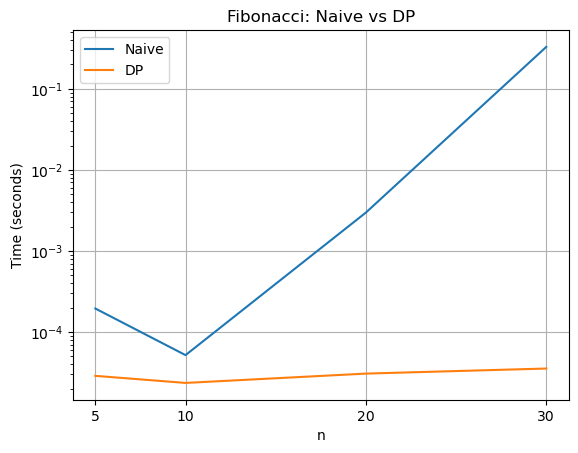

In [23]:
import time
import matplotlib.pyplot as plt

def fib_recursive(n):
    if n == 0 or n == 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_dp(n):
    dp = [0, 1]
    for i in range(2, n+1):
        dp.append(dp[i-1] + dp[i-2])
    return dp[n]

n = [5,10,20,30]

times_recursive = []
times_dp = []

for num in n:
    start = time.time()
    print(f"Fibonacci Recursive of {num}: {fib_recursive(num)}")
    end = time.time()
    print(f"Time taken (Recursive) for {num}: {end - start} seconds")
    times_recursive.append(end - start)

    start = time.time()
    print(f"Fibonacci DP of {num}: {fib_dp(num)}")
    end = time.time()
    print(f"Time taken (DP) for {num}: {end - start} seconds")
    times_dp.append(end - start)

plt.plot(n, times_recursive, label='Naive')
plt.plot(n, times_dp, label='DP')
plt.xticks(n)
plt.xlabel('n')
plt.yscale('log')
plt.ylabel('Time (seconds)')
plt.title('Fibonacci: Naive vs DP')
plt.legend()
plt.grid()
plt.show()


Naive recursion is $\mathcal{O}(2^n)$ because each function call results in two more recursive calls, leading to an exponential growth in the number of calls as $n$ increases. On the other hand, dynamic programming reduces this to $\mathcal{O}(n)$ by storing previously computed values and reusing them.

## Divide \& Conquer

In [27]:
class InversionCount():
    def __init__(self, arr):
        self.arr = arr
        self.inversions = 0

    def merge_and_count(self, left, mid, right):
        left_sub = self.arr[left:mid + 1]
        right_sub = self.arr[mid + 1:right + 1]
        
        i = j = 0
        k = left
        
        while i < len(left_sub) and j < len(right_sub):
            if left_sub[i] <= right_sub[j]:
                self.arr[k] = left_sub[i]
                i += 1
            else:
                self.arr[k] = right_sub[j]
                self.inversions += (mid - (left + i) + 1)
                j += 1
            k += 1
        
        while i < len(left_sub):
            self.arr[k] = left_sub[i]
            i += 1
            k += 1
        
        while j < len(right_sub):
            self.arr[k] = right_sub[j]
            j += 1
            k += 1

    def merge_sort_and_count(self, left, right):
        if left < right:
            mid = (left + right) // 2
            self.merge_sort_and_count(left, mid)
            self.merge_sort_and_count(mid + 1, right)
            self.merge_and_count(left, mid, right)

    def count_inversions(self):
        self.merge_sort_and_count(0, len(self.arr) - 1)
        return self.inversions
    
arr = [2, 4, 1, 3, 5]
inversion_counter = InversionCount(arr)

print("Original array:", arr)

inversion_counter = InversionCount(arr)
count = inversion_counter.count_inversions()

print("Sorted array:", inversion_counter.arr)
print("Total number of inversions:", count)

Original array: [2, 4, 1, 3, 5]
Sorted array: [1, 2, 3, 4, 5]
Total number of inversions: 3


Why is this divide and conquer?  
* Divide: Split the input array into two halves.
* Conquer: Recursively count inversions in each half.
* Combine: Count inversions between the two halves during the merge step.

This avoids checking every pair of elements, reducing the time complexity to $\mathcal{O}(n \log n)$ from the naive $\mathcal{O}(n^2)$ approach.